# Download Data with ONE light

In [1]:
# We import the libraries.
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from oneibl.onelight import ONE
one = ONE()

In [3]:
# We set the current repository to a figshare article, that was specially created with ONE light:
one.set_figshare_url("https://figshare.com/articles/steinmetz/9974357")

In [4]:
# We search all sessions that have files with a given dataset type. We could pass multiple dataset types. Here, we get all sessions that have spikes:
sessions = one.search(['spikes'])

In [5]:
# Within a repository, every session is uniquely identified by its full name, which has the following structure: labname/Subjects/subjectname/date/session.

sessions

['nicklab/Subjects/Cori/2016-12-14/001',
 'nicklab/Subjects/Cori/2016-12-17/001',
 'nicklab/Subjects/Cori/2016-12-18/001',
 'nicklab/Subjects/Forssmann/2017-11-01/001',
 'nicklab/Subjects/Forssmann/2017-11-02/001',
 'nicklab/Subjects/Forssmann/2017-11-04/001',
 'nicklab/Subjects/Forssmann/2017-11-05/001',
 'nicklab/Subjects/Hench/2017-06-15/001',
 'nicklab/Subjects/Hench/2017-06-16/001',
 'nicklab/Subjects/Hench/2017-06-17/001',
 'nicklab/Subjects/Hench/2017-06-18/001',
 'nicklab/Subjects/Lederberg/2017-12-05/001',
 'nicklab/Subjects/Lederberg/2017-12-06/001',
 'nicklab/Subjects/Lederberg/2017-12-07/001',
 'nicklab/Subjects/Lederberg/2017-12-08/001',
 'nicklab/Subjects/Lederberg/2017-12-09/001',
 'nicklab/Subjects/Lederberg/2017-12-10/001',
 'nicklab/Subjects/Lederberg/2017-12-11/001',
 'nicklab/Subjects/Moniz/2017-05-15/001',
 'nicklab/Subjects/Moniz/2017-05-16/001',
 'nicklab/Subjects/Moniz/2017-05-18/001',
 'nicklab/Subjects/Muller/2017-01-07/001',
 'nicklab/Subjects/Muller/2017-01-

In [6]:
# We take the first session.

session = sessions[0]

In [7]:
# What are the dataset types contained in this session?
one.list(session)

['Cori_2016-12-14_M2_g0_t0.imec',
 'Cori_2016-12-14_V1_g0_t0.imec',
 'channels.brainLocation',
 'channels.probe',
 'channels.rawRow',
 'channels.site',
 'channels.sitePositions',
 'clusters._phy_annotation',
 'clusters.depths',
 'clusters.originalIDs',
 'clusters.peakChannel',
 'clusters.probes',
 'clusters.templateWaveformChans',
 'clusters.templateWaveforms',
 'clusters.waveformDuration',
 'eye.area',
 'eye.timestamps',
 'eye.xyPos',
 'face.motionEnergy',
 'face.timestamps',
 'lickPiezo.raw',
 'lickPiezo.timestamps',
 'licks.times',
 'passiveBeeps.times',
 'passiveValveClick.times',
 'passiveVisual.contrastLeft',
 'passiveVisual.contrastRight',
 'passiveVisual.times',
 'passiveWhiteNoise.times',
 'probes.description',
 'probes.insertion',
 'probes.rawFilename',
 'probes.sitePositions',
 'sparseNoise.positions',
 'sparseNoise.times',
 'spikes.amps',
 'spikes.clusters',
 'spikes.depths',
 'spikes.times',
 'spontaneous.intervals',
 'trials.feedbackType',
 'trials.feedback_times',
 'tria

In [8]:
# We can load either single files, or full objects. First, let's load the spike times:

one.load_dataset(session, 'spikes.times')

17:54:13.052 [I] onelight:346         Downloading https://ndownloader.figshare.com/files/17984294 to /Users/kcenia/.one/data/figshare_00/nicklab/Subjects/Cori/2016-12-14/001/alf/spikes.times.npy.


array([[3.36666667e-03],
       [4.73333333e-03],
       [6.76666667e-03],
       ...,
       [2.70264303e+03],
       [2.70264313e+03],
       [2.70264316e+03]])

In [9]:
# Now, we load all spikes.* files:
spikes = one.load_object(session, 'spikes')

17:59:10.882 [I] onelight:346         Downloading https://ndownloader.figshare.com/files/17984285 to /Users/kcenia/.one/data/figshare_00/nicklab/Subjects/Cori/2016-12-14/001/alf/spikes.amps.npy.
17:59:23.681 [I] onelight:346         Downloading https://ndownloader.figshare.com/files/17984288 to /Users/kcenia/.one/data/figshare_00/nicklab/Subjects/Cori/2016-12-14/001/alf/spikes.clusters.npy.
17:59:30.164 [I] onelight:346         Downloading https://ndownloader.figshare.com/files/17984291 to /Users/kcenia/.one/data/figshare_00/nicklab/Subjects/Cori/2016-12-14/001/alf/spikes.depths.npy.


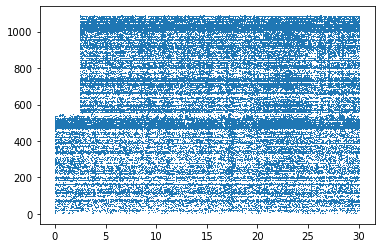

In [10]:
# The spikes object is an instance of a dictionary, that also allows for the more convenient syntax 
# interface spikes.times in addition to spikes['times']. 
# Here, we display a raster plot of the first 100,000 spikes: 

plt.plot(spikes.times[:100000], spikes.clusters[:100000], ',');

In [14]:
spk_times = one.load_dataset(session, 'spikes.times')
eye = one.load_dataset(session, 'eye.area')

18:04:49.891 [I] onelight:346         Downloading https://ndownloader.figshare.com/files/17984225 to /Users/kcenia/.one/data/figshare_00/nicklab/Subjects/Cori/2016-12-14/001/alf/eye.area.npy.


In [35]:
resp_times = one.load_dataset(session, 'trials.response_times')

In [36]:
print(len(spk_times), len(eye), len(resp_times))
print(spk_times)
print(eye)

10017476 214 214
[[3.36666667e-03]
 [4.73333333e-03]
 [6.76666667e-03]
 ...
 [2.70264303e+03]
 [2.70264313e+03]
 [2.70264316e+03]]
[[  66.41961196]
 [  72.60220579]
 [  77.00167129]
 [  83.50206455]
 [  87.61772745]
 [  92.16771994]
 [  97.11750846]
 [ 100.90058594]
 [ 107.66357589]
 [ 112.31660606]
 [ 116.8327424 ]
 [ 126.4034579 ]
 [ 130.84899994]
 [ 134.61567822]
 [ 138.11511853]
 [ 143.73140402]
 [ 154.94957207]
 [ 163.59740554]
 [ 168.86367883]
 [ 172.91338661]
 [ 178.0349687 ]
 [ 185.67943803]
 [ 190.02898959]
 [ 195.11348821]
 [ 200.19538288]
 [ 204.57847061]
 [ 209.21049653]
 [ 212.86128824]
 [ 216.71097409]
 [ 223.07757796]
 [ 232.89326264]
 [ 238.26233211]
 [ 244.97634876]
 [ 248.64312701]
 [ 254.82553187]
 [ 259.41906669]
 [ 271.63789018]
 [ 275.37470879]
 [ 279.94122878]
 [ 284.52426629]
 [ 295.4069757 ]
 [ 300.39006493]
 [ 304.67258459]
 [ 309.50624052]
 [ 315.6795062 ]
 [ 318.80572126]
 [ 323.87181806]
 [ 331.77139886]
 [ 335.82123464]
 [ 340.68806207]
 [ 348.45754809]
 [

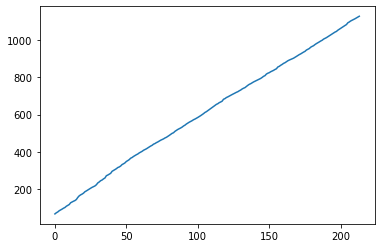

In [38]:
plt.plot(resp_times)